In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitness-tracker-dataset/gym_members_exercise_tracking_synthetic_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/kaggle/input/fitness-tracker-dataset/gym_members_exercise_tracking_synthetic_data.csv')

print("First five rows of the dataset:")
print(df.head())

First five rows of the dataset:
    Age  Gender  Weight (kg)  Height (m) Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0  Female         86.7        1.86     174    152.0         74.0   
1  26.0  Female         84.7        1.83     166    156.0         73.0   
2  22.0    Male         64.8        1.85     187    166.0         64.0   
3  54.0  Female         75.3        1.82     187    169.0         58.0   
4  34.0  Female         52.8        1.74     177    169.0         66.0   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.12            712.0     Strength            12.8   
1                      1.00            833.0     Strength            27.9   
2                      1.24           1678.0       Cardio            28.7   
3                      1.45            628.0       Cardio            31.8   
4                      1.60           1286.0     Strength            26.4   

   Water_Intake (liters)  Workout_Frequency (days/week)  Exp

In [3]:
print("\nDataset shape (rows, columns):", df.shape)
print("\nColumn names:", df.columns)
print("\nData types and non-null counts:")
print(df.info())
print("\nSummary statistics for numeric columns:")
print(df.describe())


Dataset shape (rows, columns): (1800, 15)

Column names: Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM      


Missing values in each column:
Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
BMI_Recalc                        0
BMI_Difference                   30
Workout_Intensity                30
dtype: int64


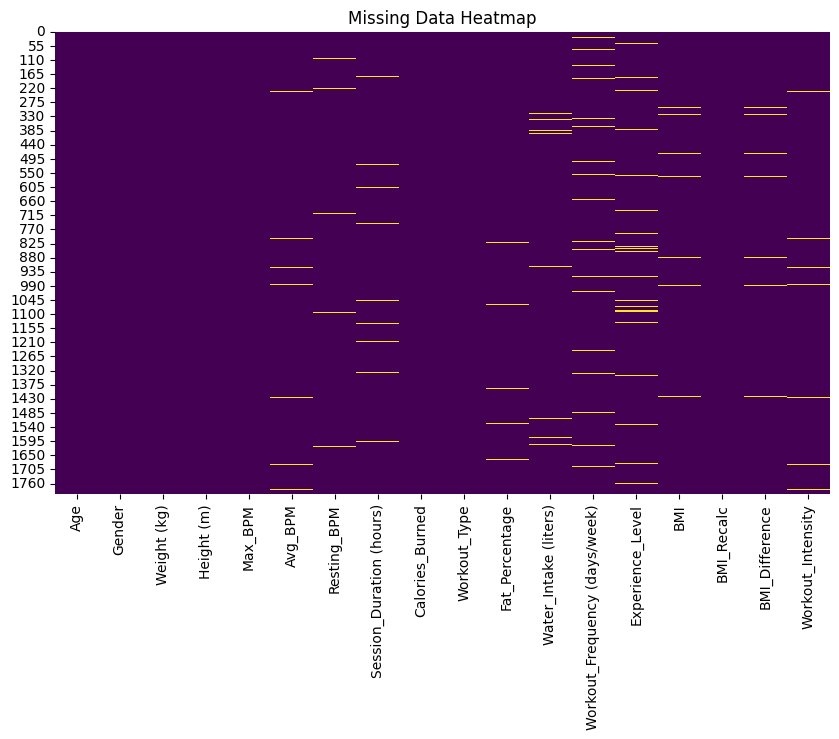


Missing values after imputation:
Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
BMI_Recalc                        0
BMI_Difference                   30
Workout_Intensity                30
dtype: int64


In [13]:
print("\nMissing values in each column:")
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Weight (kg)'] = df['Weight (kg)'].fillna(df['Weight (kg)'].mean())
df['Height (m)'] = df['Height (m)'].fillna(df['Height (m)'].mean())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Workout_Type'] = df['Workout_Type'].fillna(df['Workout_Type'].mode()[0])

print("\nMissing values after imputation:")
print(df.isnull().sum())


In [5]:
print("\nNumber of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [9]:
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].mean())

    print(f"Processed column '{col}':")
    print(df[col].head())  
    print(f"Number of missing values after filling: {df[col].isnull().sum()}\n")


Processed column 'Max_BPM':
0    174.0
1    166.0
2    187.0
3    187.0
4    177.0
Name: Max_BPM, dtype: float64
Number of missing values after filling: 0

Processed column 'Calories_Burned':
0     712.0
1     833.0
2    1678.0
3     628.0
4    1286.0
Name: Calories_Burned, dtype: float64
Number of missing values after filling: 0



In [11]:
df['BMI_Recalc'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)
print("Recalculated BMI (first 5 rows):")
print(df[['Weight (kg)', 'Height (m)', 'BMI_Recalc']].head())

df['BMI_Difference'] = df['BMI_Recalc'] - df['BMI']
print("\nBMI Difference (first 5 rows):")
print(df[['BMI', 'BMI_Recalc', 'BMI_Difference']].head())

df['Workout_Intensity'] = df['Avg_BPM'] / df['Max_BPM']
print("\nWorkout Intensity (first 5 rows):")
print(df[['Avg_BPM', 'Max_BPM', 'Workout_Intensity']].head())

Recalculated BMI (first 5 rows):
   Weight (kg)  Height (m)  BMI_Recalc
0         86.7        1.86   25.060701
1         84.7        1.83   25.291887
2         64.8        1.85   18.933528
3         75.3        1.82   22.732762
4         52.8        1.74   17.439556

BMI Difference (first 5 rows):
     BMI  BMI_Recalc  BMI_Difference
0  14.31   25.060701       10.750701
1  33.49   25.291887       -8.198113
2  12.73   18.933528        6.203528
3  20.37   22.732762        2.362762
4  20.83   17.439556       -3.390444

Workout Intensity (first 5 rows):
   Avg_BPM  Max_BPM  Workout_Intensity
0    152.0    174.0           0.873563
1    156.0    166.0           0.939759
2    166.0    187.0           0.887701
3    169.0    187.0           0.903743
4    169.0    177.0           0.954802


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


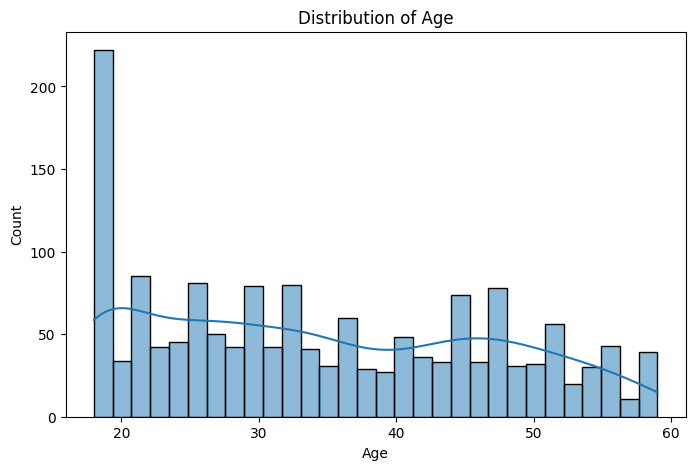

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


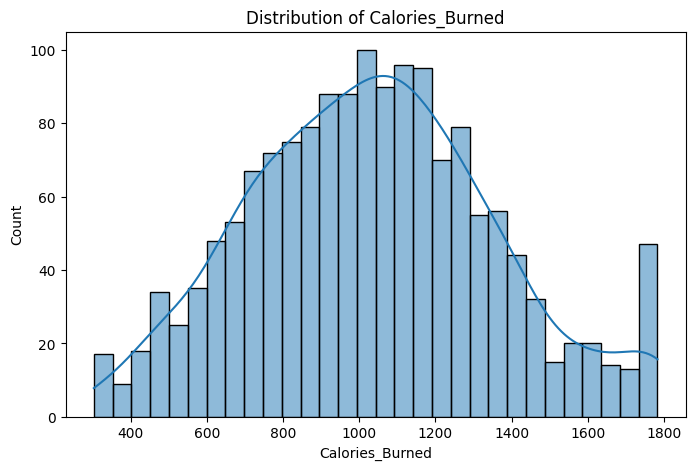

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


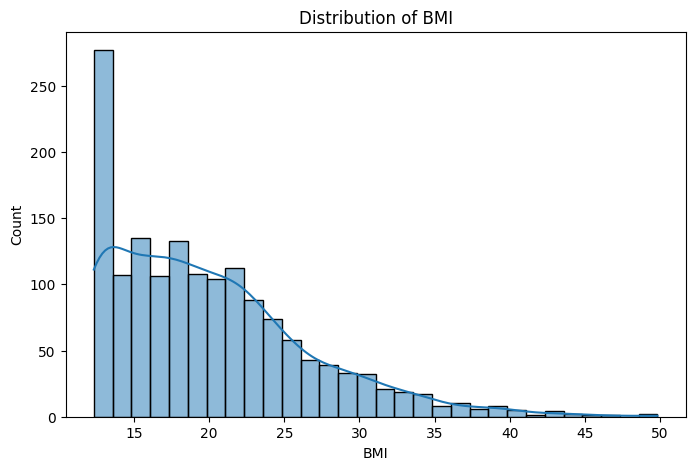

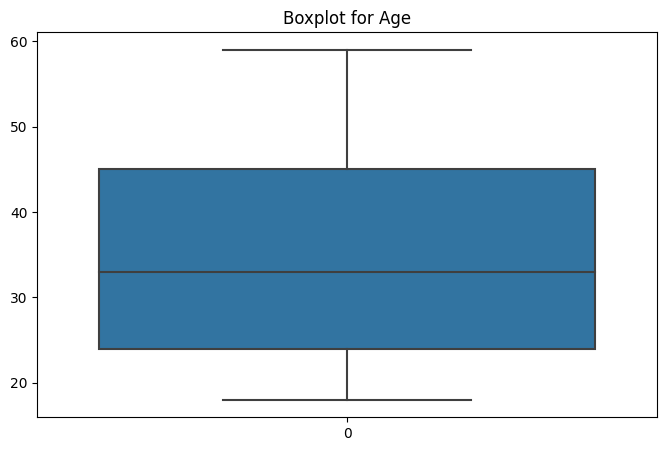

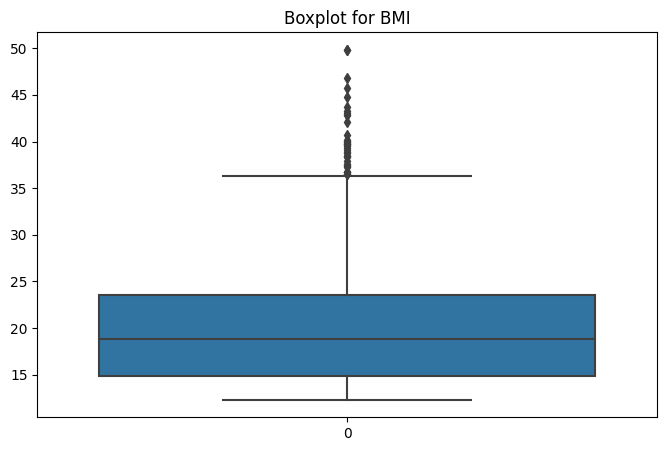

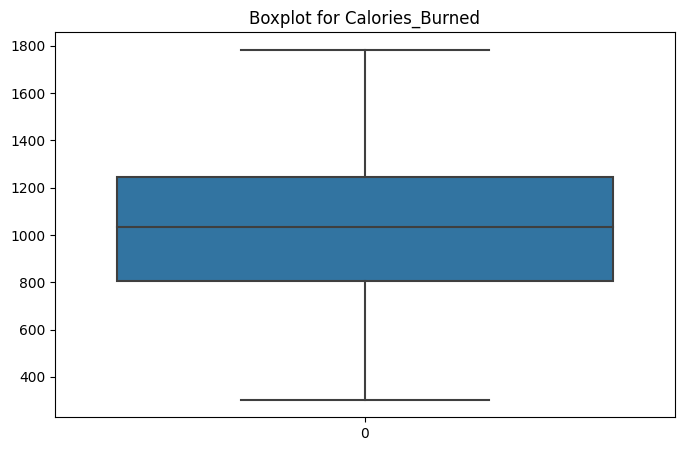

In [16]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(inplace=True)  

for column in ['Age', 'Calories_Burned', 'BMI']:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.show()

for column in ['Age', 'BMI', 'Calories_Burned']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()


In [17]:
for column in ['Age', 'BMI', 'Calories_Burned']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    print(f"Outliers in {column}: {len(outliers)}")
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]


Outliers in Age: 0
Outliers in BMI: 37
Outliers in Calories_Burned: 0


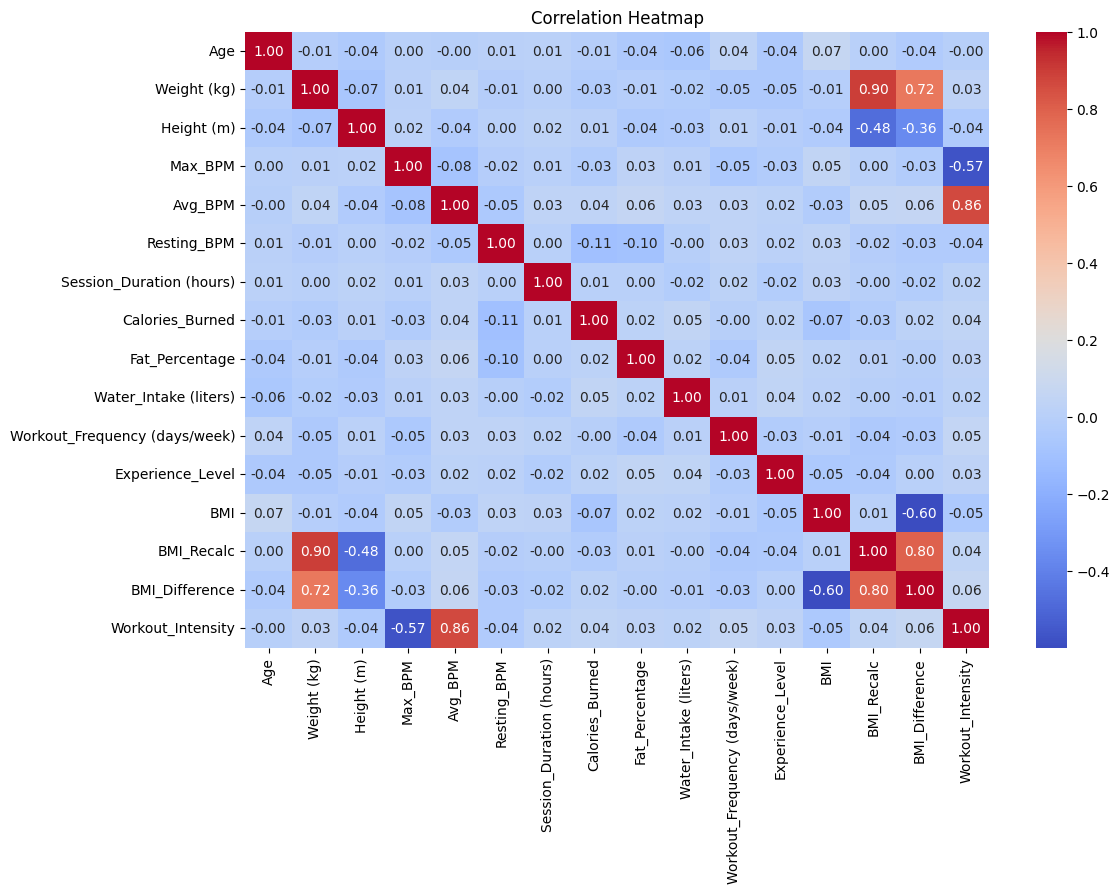

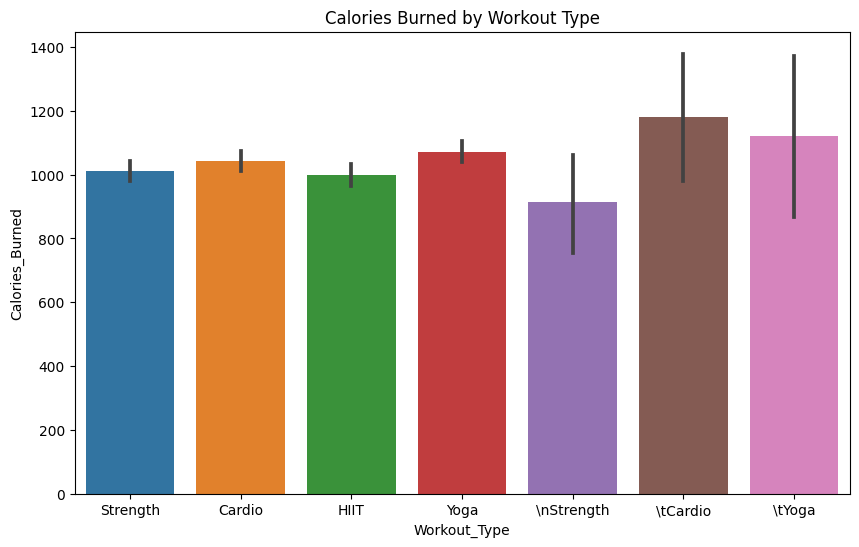

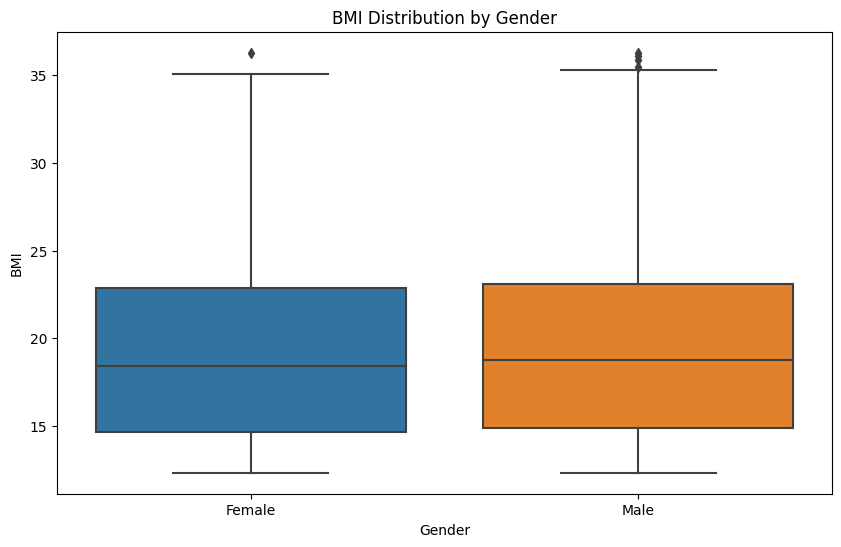

In [20]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Workout_Type', y='Calories_Burned')
plt.title("Calories Burned by Workout Type")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='BMI')
plt.title("BMI Distribution by Gender")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


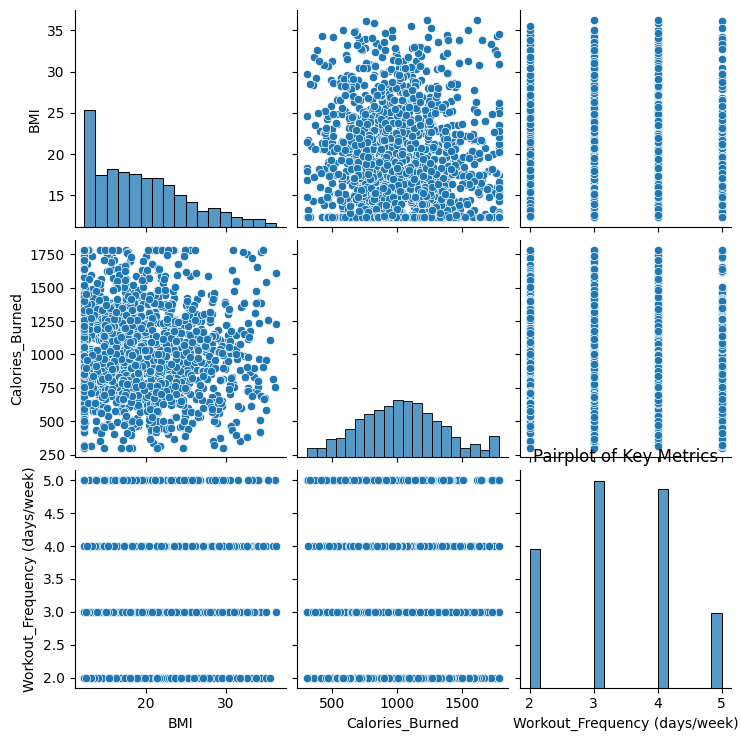

In [25]:
sns.pairplot(df[['BMI', 'Calories_Burned', 'Workout_Frequency (days/week)']])
plt.title("Pairplot of Key Metrics")
plt.show()


In [26]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Workout_Type'], drop_first=True)

In [28]:
print("\nSummary of Findings:")
print("- Dataset shape after processing:", df.shape)
print("- Example of processed data:\n", df.head())
print("- Key insights:")
print("  1. Trends in Calories_Burned by Workout_Type and Gender observed.")
print("  2. Significant correlation between Session_Duration and Calories_Burned.")
print("  3. Outliers handled, and features normalized for further analysis.")


Summary of Findings:
- Dataset shape after processing: (1517, 18)
- Example of processed data:
     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0  Female         86.7        1.86    174.0    152.0         74.0   
1  26.0  Female         84.7        1.83    166.0    156.0         73.0   
2  22.0    Male         64.8        1.85    187.0    166.0         64.0   
3  54.0  Female         75.3        1.82    187.0    169.0         58.0   
4  34.0  Female         52.8        1.74    177.0    169.0         66.0   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.12            712.0     Strength            12.8   
1                      1.00            833.0     Strength            27.9   
2                      1.24           1678.0       Cardio            28.7   
3                      1.45            628.0       Cardio            31.8   
4                      1.60           1286.0     Strength          